In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,Justin Bieber: Always Believing,2012
2,The Thousand Plane Raid,1969
3,Crucea de piatra,1993
4,The 86,2015


In [26]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

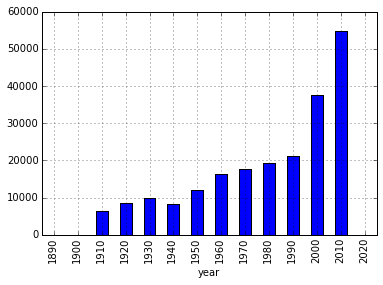

In [9]:
t = titles
t.groupby(t.year//10*10).size().plot(kind='bar')

### Use groupby() to plot the number of "Hamlet" films made each decade.

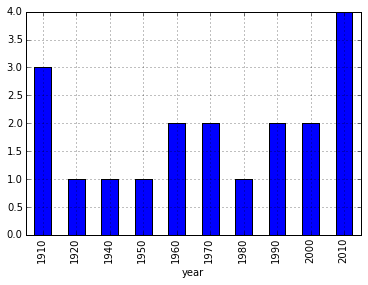

In [18]:
t = titles[titles.title == 'Hamlet']
t.groupby(t.year//10*10).size().plot(kind='bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

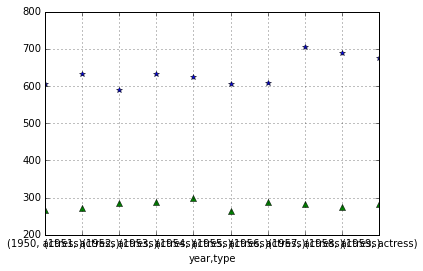

In [50]:
c = cast[cast.year//10 == 195]
c = c[c.n == 1]
c[c.type == 'actor'].groupby(['year','type']).size().plot(style='*')
c[c.type == 'actress'].groupby(['year','type']).size().plot(style='^')

### showing gender inequality :P

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [53]:
c = cast[cast.year//10 == 195]
c = c[c.n<=5]
c.groupby(['n','type']).size()

n  type   
1  actor      6363
   actress    2804
2  actor      4372
   actress    4385
3  actor      5392
   actress    3007
4  actor      5386
   actress    2740
5  actor      5416
   actress    2438
dtype: int64

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [60]:
c = cast[cast.title.str.lower().str.contains('pink panther')]
c.groupby('title').n.max()

title
Curse of the Pink Panther         63
Revenge of the Pink Panther       57
Son of the Pink Panther           43
The Pink Panther                  50
The Pink Panther 2                36
The Pink Panther Strikes Again    60
The Return of the Pink Panther    27
Trail of the Pink Panther         32
Name: n, dtype: float64

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [72]:
c = cast[cast.name == 'Frank Oz']
g = c.groupby(['year','title']).character.size()
g[g>1]

year  title                                   
1979  The Muppet Movie                            8
1981  An American Werewolf in London              2
      The Great Muppet Caper                      6
1982  The Dark Crystal                            2
1984  The Muppets Take Manhattan                  7
1985  Sesame Street Presents: Follow that Bird    3
1992  The Muppet Christmas Carol                  7
1996  Muppet Treasure Island                      4
1999  Muppets from Space                          4
      The Adventures of Elmo in Grouchland        3
dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [76]:
c = cast[cast.name == 'Frank Oz']
c = c.groupby('character').size()
c[c>1].order()

character
Grover            2
Bert              3
Cookie Monster    3
Fozzie Bear       4
Sam the Eagle     5
Yoda              5
Animal            6
Miss Piggy        6
dtype: int64